In [1]:
import pandas as pd
import numpy as np
import keras
import os
import cv2
import matplotlib.pyplot as plt

In [2]:
IMG_DIR=r'C:\Users\tanma\OneDrive\Desktop\staragile\data files\fire_dataset'
SIZE = (224,224)

In [5]:
def read_images(IMG_DIR, SIZE):
    x = [] # creating empty list
    y = []

    for folder_name in os.listdir(IMG_DIR):   
        folder_path = f'{IMG_DIR}/{folder_name}'
        for img_file in os.listdir(folder_path):
            img_file = f'{folder_path}/{img_file}'
            
            if img_file.endswith('.png'): # checking the extension of image
                img_array = cv2.imread(img_file) # cv to read img and resize them
                if img_array is not None: # checking if image is not empty
                    img_array = cv2.resize(img_array, SIZE, interpolation = cv2.INTER_AREA)
                    x.append(img_array)
                    y.append(folder_name)
                
    x = np.array(x) # coverting to array
    y = np.array(y)
    
    return (x, y)

In [6]:
#by using defined function, read the data into X and Y varibles
X, Y = read_images(IMG_DIR, SIZE)
print(X.shape, Y.shape)

(998, 224, 224, 3) (998,)


In [48]:
X

array([[[[207, 208, 204],
         [207, 208, 204],
         [207, 208, 204],
         ...,
         [145, 158, 167],
         [150, 165, 169],
         [151, 166, 169]],

        [[209, 210, 206],
         [209, 210, 206],
         [207, 208, 204],
         ...,
         [146, 159, 167],
         [150, 164, 168],
         [149, 163, 169]],

        [[207, 208, 204],
         [207, 208, 204],
         [207, 208, 204],
         ...,
         [149, 162, 170],
         [151, 166, 170],
         [152, 165, 173]],

        ...,

        [[ 46,  56,  70],
         [ 47,  62,  75],
         [ 25,  39,  55],
         ...,
         [ 48,  67,  89],
         [ 46,  73,  94],
         [ 39,  66,  82]],

        [[ 32,  47,  58],
         [ 50,  72,  90],
         [ 64,  86, 112],
         ...,
         [ 40,  56,  77],
         [ 54,  80,  94],
         [ 58,  87, 108]],

        [[ 35,  45,  56],
         [ 40,  56,  75],
         [ 60,  80, 110],
         ...,
         [ 26,  40,  50],
        

In [49]:
Y

array(['fire_images', 'fire_images', 'fire_images', 'fire_images',
       'fire_images', 'fire_images', 'fire_images', 'fire_images',
       'fire_images', 'fire_images', 'fire_images', 'fire_images',
       'fire_images', 'fire_images', 'fire_images', 'fire_images',
       'fire_images', 'fire_images', 'fire_images', 'fire_images',
       'fire_images', 'fire_images', 'fire_images', 'fire_images',
       'fire_images', 'fire_images', 'fire_images', 'fire_images',
       'fire_images', 'fire_images', 'fire_images', 'fire_images',
       'fire_images', 'fire_images', 'fire_images', 'fire_images',
       'fire_images', 'fire_images', 'fire_images', 'fire_images',
       'fire_images', 'fire_images', 'fire_images', 'fire_images',
       'fire_images', 'fire_images', 'fire_images', 'fire_images',
       'fire_images', 'fire_images', 'fire_images', 'fire_images',
       'fire_images', 'fire_images', 'fire_images', 'fire_images',
       'fire_images', 'fire_images', 'fire_images', 'fire_imag

Text(0.5, 1.0, 'non_fire_images')

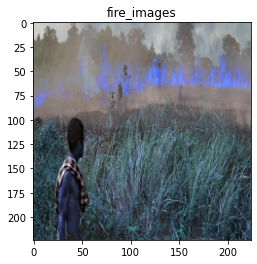

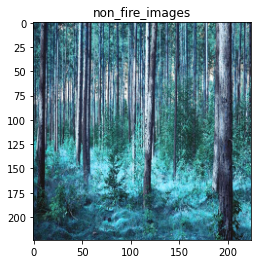

In [10]:
# visualisation of img we loaded
plt.figure(figsize=(4,4))
plt.imshow(X[0])
plt.title(Y[0])

plt.figure(figsize=(4,4))
plt.imshow(X[850])
plt.title(Y[850])

In [12]:
# for the data preparation
# first need to covert the y labes into the numeirical form using label encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
Y= le.fit_transform(Y)

In [13]:
# to check whether it is changed or not
Y.dtype

dtype('int64')

In [14]:
# the dtype of Y is int so make sure it will be in categorical for modelling and machine undrstanding
Y= keras.utils.to_categorical(Y, num_classes=2)
Y.dtype

dtype('float32')

In [16]:
Y, Y.shape 

(array([[1., 0.],
        [1., 0.],
        [1., 0.],
        ...,
        [0., 1.],
        [0., 1.],
        [0., 1.]], dtype=float32),
 (998, 2))

In [17]:
# as X is in int datatype so need to change it dtype for standardize the dta
X =X.astype('float32')
X= X/255
X

array([[[[0.8117647 , 0.8156863 , 0.8       ],
         [0.8117647 , 0.8156863 , 0.8       ],
         [0.8117647 , 0.8156863 , 0.8       ],
         ...,
         [0.5686275 , 0.61960787, 0.654902  ],
         [0.5882353 , 0.64705884, 0.6627451 ],
         [0.5921569 , 0.6509804 , 0.6627451 ]],

        [[0.81960785, 0.8235294 , 0.80784315],
         [0.81960785, 0.8235294 , 0.80784315],
         [0.8117647 , 0.8156863 , 0.8       ],
         ...,
         [0.57254905, 0.62352943, 0.654902  ],
         [0.5882353 , 0.6431373 , 0.65882355],
         [0.58431375, 0.6392157 , 0.6627451 ]],

        [[0.8117647 , 0.8156863 , 0.8       ],
         [0.8117647 , 0.8156863 , 0.8       ],
         [0.8117647 , 0.8156863 , 0.8       ],
         ...,
         [0.58431375, 0.63529414, 0.6666667 ],
         [0.5921569 , 0.6509804 , 0.6666667 ],
         [0.59607846, 0.64705884, 0.6784314 ]],

        ...,

        [[0.18039216, 0.21960784, 0.27450982],
         [0.18431373, 0.24313726, 0.29411766]

In [19]:
# for modeling we need to split the data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(X, Y, test_size=0.35, random_state=16)

In [20]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((648, 224, 224, 3), (350, 224, 224, 3), (648, 2), (350, 2))

In [24]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, MaxPooling2D, Conv2D
from keras.callbacks import EarlyStopping

In [23]:
# to create a model using conv laye
model=Sequential()
model.add(Conv2D(32, input_shape=(224,224,3), kernel_size=(3,3), activation='relu'))

model.add(Conv2D(64,kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dropout(0.5))

model.add(Dense(64, activation='relu'))
model.add(Dense(2, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 conv2d_4 (Conv2D)           (None, 220, 220, 64)      18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 110, 110, 64)     0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 110, 110, 64)      0         
                                                                 
 conv2d_5 (Conv2D)           (None, 108, 108, 32)      18464     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 32)       0         
 2D)                                                  

In [25]:
# for compiling the model and use of early stooping 
model.compile(optimizer ='adam',loss = keras.losses.categorical_crossentropy,metrics = ["accuracy"])
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

In [26]:
H = model.fit(x_train, y_train, batch_size=32, epochs=10, validation_data=(x_test, y_test), callbacks=early_stopping, verbose=True)

Epoch 1/10
21/21 [==============================] - 115s 5s/step - loss: 0.8739 - accuracy: 0.7022 - val_loss: 0.3868 - val_accuracy: 0.8200
Epoch 2/10
21/21 [==============================] - 115s 5s/step - loss: 0.1985 - accuracy: 0.9198 - val_loss: 0.2335 - val_accuracy: 0.8857
Epoch 3/10
21/21 [==============================] - 121s 6s/step - loss: 0.2414 - accuracy: 0.9259 - val_loss: 0.2491 - val_accuracy: 0.9086
Epoch 4/10
21/21 [==============================] - 119s 6s/step - loss: 0.1310 - accuracy: 0.9552 - val_loss: 0.1754 - val_accuracy: 0.9543
Epoch 5/10
21/21 [==============================] - 120s 6s/step - loss: 0.0802 - accuracy: 0.9691 - val_loss: 0.1482 - val_accuracy: 0.9457
Epoch 6/10
21/21 [==============================] - 120s 6s/step - loss: 0.0657 - accuracy: 0.9799 - val_loss: 0.1724 - val_accuracy: 0.9257
Epoch 7/10
21/21 [==============================] - 125s 6s/step - loss: 0.0698 - accuracy: 0.9707 - val_loss: 0.1884 - val_accuracy: 0.9429
Epoch 8/10
21

In [27]:
model.evaluate(x_test, y_test)

11/11 [==============================] - 13s 1s/step - loss: 0.2319 - accuracy: 0.9457


[0.23191998898983002, 0.9457142949104309]